In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from jscon import make_image as mk_image
from jscon import make_stars as mk_star

In [3]:
## path to output file for random stars
file_random_stars = "/Volumes/G-DRIVE/jasmine/working_dir/2022_1101/random_stars.csv"

# Load catalog
catalog_name = "/Volumes/G-DRIVE/jasmine/working_dir/2022_1027/gns+ohsawa_bright_stars.csv"
catalog = mk_image.get_catalog_info_for_making_stars(catalog_name)

/opt/anaconda3/envs/test/lib/python3.8/site-packages/pandas/core/computation/expressions.py:214: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  warnings.warn(


In [4]:
# Latititude Shift from (0, 360) -> (-180, 180)
catalog_shifted = catalog
mask_shifted = catalog_shifted["gal_l"]>180
catalog_shifted["gal_l"][mask_shifted] -=360


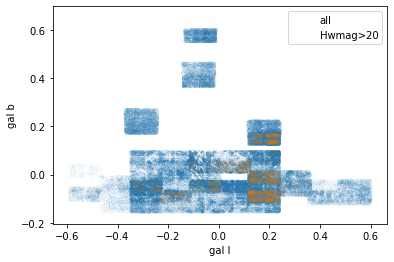

In [6]:
## plot all stars & highlight faint stars
mask_hwmag = catalog_shifted["hwmag"]>20
plt.scatter(catalog_shifted["gal_l"], catalog_shifted["gal_b"], s = 0.0001, label="all")
plt.scatter(catalog_shifted["gal_l"][mask_hwmag], catalog_shifted["gal_b"][mask_hwmag], s = 0.0001, label="Hwmag>20")
plt.legend()
plt.xlabel("gal l")
plt.ylabel("gal b")
plt.show()

/opt/anaconda3/envs/test/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


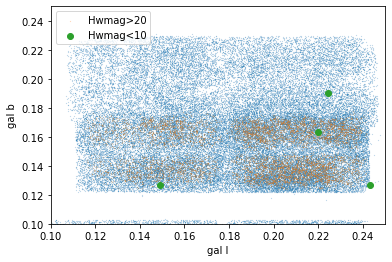

In [7]:
## Zoom-up view of field with faint stars
plt.scatter(catalog_shifted["gal_l"], catalog_shifted["gal_b"], s = 0.01)
plt.scatter(catalog_shifted["gal_l"][mask_hwmag], catalog_shifted["gal_b"][mask_hwmag], s = 0.01, label="Hwmag>20")
mask_hwmag_bright = catalog_shifted["hwmag"]<10s
plt.scatter(catalog_shifted["gal_l"][mask_hwmag_bright], catalog_shifted["gal_b"][mask_hwmag_bright], label="Hwmag<10")#, s = 1)
plt.xlim(0.1, 0.25)
plt.ylim(0.1, 0.25)
plt.xlabel("gal l")
plt.ylabel("gal b")
plt.legend()
plt.show()

In [8]:
# A set of stars to produce random stars
# Stars in (l_min_choose, l_max_choose) & (b_min_choose, b_max_choose) are taken. 
l_min_choose = 0.18
l_max_choose = 0.24
b_min_choose = 0.15
b_max_choose = 0.17
mask_stars_for_learn = (catalog_shifted["gal_l"]>l_min_choose) * (catalog_shifted["gal_l"]<l_max_choose)* (catalog_shifted["gal_b"]>b_min_choose) * (catalog_shifted["gal_b"]<b_max_choose)
catalog_stars_for_learn = catalog_shifted[mask_stars_for_learn]

In [10]:
# Produce random stars with the same stellar density as input distribution
npix = 2000 ### number of pixel for assumed image
pix_arcsec = 0.4 ### pixelscale
wd_for_image = 2000 * 0.4/3600 #deg
df_random_stars = mk_star.make_new_stars( catalog_stars_for_learn["gal_l"],catalog_stars_for_learn["gal_b"] ,catalog_stars_for_learn["hwmag"], 0, wd_for_image, 0,wd_for_image)
df_random_stars.to_csv(file_random_stars)